In [65]:
## Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, AutoDateFormatter, AutoDateLocator, WeekdayLocator, MonthLocator, DayLocator, DateLocator, DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import datetime, calendar
#from datetime import datetime
import matplotlib.patches as mpatches
%matplotlib inline

## Import data frome pickle generated from muß ein file mit agentenstats sein
data = pd.read_pickle('/home/keuch/gits/keuch/code_box/pyt/spreadsheetparsing/entwuerfe/xls_testruns/agentenpickel.pkl')
data2=data.drop(['dt','dd','hh','tt','acw','wd','yy','ag','ht','vl','mm','an'],1)
wsplit=data2.groupby(['ww','lo','bz']).sum()

In [66]:
def ttmonatl(frame,agent):
    fig=plt.figure(figsize=(6,4))
    fig.suptitle('talk- und handlingtimes '+agent)
    aht="#003873"
    aacw="#EE0042"
    att="#899EB2"
    nzb="#C7798F"

    ax=fig.add_subplot(111)
    ax.margins(0,0)
    ax.set_xlabel('Monat')
    ax.set_ylabel('Minuten')
    ax.set_xticks(ustck.index)
    ax.set_ylim(0,10)
    ax.axhline(y=3.5,color=nzb,ls='--',alpha=0.6, label='3:30min')
    htime=ax.plot(frame.index,ustck['aht',agent],color=aht,label='aht')
    ttime=ax.plot(frame.index,ustck['att',agent],color=att,label='att')
    wtime=ax.plot(frame.index,ustck['aacw',agent],color=aacw,label='aacw')
    for mon in htime:
        xpos=mon.get_xdata()
        heig=mon.get_ydata()
        for coord in xpos:
            calls=frame['be',agent].values[coord-1]
            note=ax.text(coord,ax.get_ylim()[1], s=str(int(calls)),ha='center')

    ax.legend()

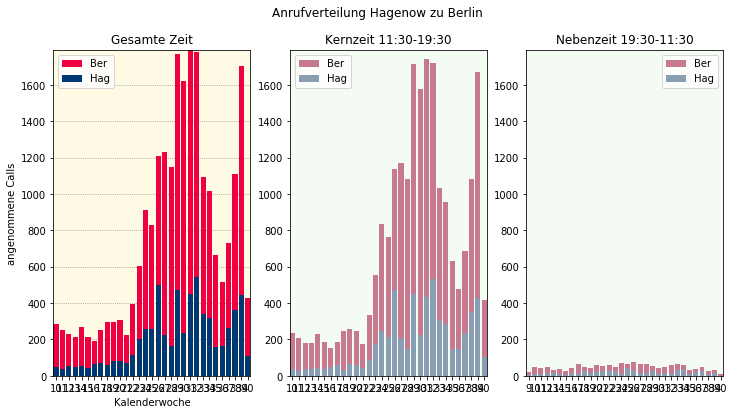

In [67]:
unstckd=wsplit.unstack().unstack()
kernzeit=unstckd['be','k']
nebenzeit=unstckd['be','n']

fig=plt.figure(figsize=(12,6))
fig.suptitle('Anrufverteilung Hagenow zu Berlin')
kzh="#003873"
kzb="#EE0042"
nzh="#899EB2"
nzb="#C7798F"

ax=fig.add_subplot(131)
ax.margins(0,0)
ax.set_facecolor('#FFFAE4')
ax.set_xticks(unstckd.index)
ax.set_title('Gesamte Zeit')
ax.set_ylabel('angenommene Calls')
ax.set_xlabel('Kalenderwoche')
ax.yaxis.grid(True, which='major', color='#8C8C8C', linestyle=':')
ax.set_axisbelow(True)
p2 = ax.bar(unstckd.index, nebenzeit['B']+kernzeit['B'], width=.8, color=kzb, bottom=nebenzeit['H']+kernzeit['H'], label="Ber")
p1 = ax.bar(unstckd.index, nebenzeit['H']+kernzeit['H'], width=.8, color=kzh, label="Hag")
maxcalls=ax.get_ylim()

ax2=fig.add_subplot(132)
ax2.margins(0,0)
ax2.set_facecolor('#F4FBF3')
ax2.set_xticks(unstckd.index)
ax2.set_title('Kernzeit 11:30-19:30')
ax2.set_ylim(maxcalls)
p2 = ax2.bar(unstckd.index, kernzeit['B'], width=.8, color=nzb, bottom=kernzeit['H'], label="Ber")
p1 = ax2.bar(unstckd.index, kernzeit['H'], width=.8, color=nzh, label="Hag")

ax3=fig.add_subplot(133)
ax3.margins(0,0)
ax3.set_facecolor('#F4FBF3')
ax3.set_xticks(unstckd.index)
ax3.set_title('Nebenzeit 19:30-11:30')
ax3.set_ylim(maxcalls)
p2 = ax3.bar(unstckd.index, nebenzeit['B'], width=.8, color=nzb, bottom=nebenzeit['H'], label="Ber")
p1 = ax3.bar(unstckd.index, nebenzeit['H'], width=.8, color=nzh, label="Hag")

ax.legend()
ax2.legend()
ax3.legend()

In [68]:
# Hier wird ein df erzeugt, der die einzelnen Zeiten als obere Ebene zusammenfasst, und darunter die Agenten
# namen der Spalten wie folgt:
# an=angenommene Anrufe, be=bearbeitete Anrufe, vl=verlorene Anrufe, tt=talktime absolut, acw=nacharbeit absolut
# zusätzlich, berechnet:ht=gesamtarbeitszeit (tt+acw), jeweils, aht att acw = durchschnitt (ht,tt,acw/be)

colfunx={'tt':'sum','acw':'sum','be':'sum','vl':'sum','an':'sum'}
monate=data.groupby(['mm','ag']).agg(colfunx)
monate['ht']=monate.tt+monate.acw
monate['att']=monate['tt']/monate.be
monate['aacw']=monate['acw']/monate.be
monate['aht']=monate['ht']/monate.be
ustck=monate.unstack()

alleagenten=monate.reset_index().groupby('mm')[['acw','tt','ht','be']].sum()
alleagenten['aht']=alleagenten['ht']/alleagenten['be']
alleagenten['att']=alleagenten['tt']/alleagenten['be']
alleagenten['aacw']=alleagenten['acw']/alleagenten['be']
alleagenten


ustck.loc[:,('be','alle')]=alleagenten['be']
ustck.loc[:,('aht','alle')]=alleagenten['aht']
ustck.loc[:,('att','alle')]=alleagenten['att']
ustck.loc[:,('aacw','alle')]=alleagenten['aacw']


In [69]:
#ttmonatl(ustck,'gesinst')
ustck.loc[8]['be']

ag
Gesing Carexpert        NaN
Papke Carexpert         NaN
Stanz Carexpert         NaN
beckeca               136.0
beckesi               389.0
beckfra               192.0
bretsal                36.0
dehnsil                44.0
diessro               376.0
gesinst               148.0
gesinst Carexpert     417.0
geyerme               186.0
gorushe               216.0
haenthe                 NaN
haustst                 NaN
henniju               103.0
jakobir                 NaN
meyergu                 NaN
neumath               225.0
papkeda                 NaN
papkeda Carexpert       NaN
pfeifpe               199.0
pinnkat                 NaN
pletaan               426.0
plichba               145.0
rabechr               119.0
radtkke                92.0
reismat                 NaN
ruschfi               739.0
scholan               181.0
stanzju               104.0
stanzju Carexpert     222.0
steffci               332.0
strausi                40.0
tetzlva               435.0
tonnroy          

In [70]:
data.loc['2017-08']

dt    yy       tt bz  hh  dd  \
2017-08-01 07:00:00 dehnsil            2017-08-01  2017   0.4333  n   7   1   
                    radtkke            2017-08-01  2017   0.9833  n   7   1   
2017-08-01 08:00:00 dehnsil            2017-08-01  2017    35.65  k   8   1   
                    diessro            2017-08-01  2017  15.8833  k   8   1   
                    neumath            2017-08-01  2017  35.8333  k   8   1   
                    plichba            2017-08-01  2017  31.5833  k   8   1   
                    radtkke            2017-08-01  2017  23.2667  k   8   1   
                    ruschfi            2017-08-01  2017     4.25  k   8   1   
                    stanzju Carexpert  2017-08-01  2017  21.9333  k   8   1   
2017-08-01 09:00:00 dehnsil            2017-08-01  2017   4.5167  k   9   1   
                    diessro            2017-08-01  2017  11.7333  k   9   1   
                    neumath            2017-08-01  2017    24.45  k   9   1   
                    plichba            2017-08-01  2017     21.4  k   9   1   
                    radtkke            2017-08-01  2017    14.05  k   9   1   
                    ruschfi            2017-08-01  2017  31.4167  k   9   1   
                    stanzju Carexpert  2017-08-01  2017       10  k   9   1   
2017-08-01 10:00:00 dehnsil            2017-08-01  2017     15.1  k  10   1   
                    diessro            2017-08-01  2017  22.7333  k  10   1   
                    neumath            2017-08-01  2017    41.95  k  10   1   
                    plichba            2017-08-01  2017  31.7167  k  10   1   
                    radtkke            2017-08-01  2017  28.9667  k  10   1   
                    ruschfi            2017-08-01  2017  34.1167  k  10   1   
                    stanzju Carexpert  2017-08-01  2017     1.95  k  10   1   
2017-08-01 11:00:00 dehnsil            2017-08-01  2017   8.9833  k  11   1   
                    diessro            2017-08-01  2017    12.75  k  11   1   
                    neumath            2017-08-01  2017  37.0667  k  11   1   
                    plichba            2017-08-01  2017  37.4667  k  11   1   
                    radtkke            2017-08-01  2017    32.35  k  11   1   
                    ruschfi            2017-08-01  2017  48.5333  k  11   1   
                    stanzju Carexpert  2017-08-01  2017   5.6833  k  11   1   
...                                           ...   ...      ... ..  ..  ..   
2017-08-31 14:00:00 gesinst            2017-08-31  2017   4.9833  k  14  31   
                    gorushe            2017-08-31  2017   2.8167  k  14  31   
                    ruschfi            2017-08-31  2017  15.6667  k  14  31   
                    stanzju            2017-08-31  2017    21.55  k  14  31   
                    steffci            2017-08-31  2017  19.8833  k  14  31   
2017-08-31 15:00:00 gorushe            2017-08-31  2017    18.15  k  15  31   
                    henniju            2017-08-31  2017   5.1667  k  15  31   
                    neumath            2017-08-31  2017    17.85  k  15  31   
                    rabechr            2017-08-31  2017   1.5667  k  15  31   
                    ruschfi            2017-08-31  2017     18.5  k  15  31   
                    stanzju            2017-08-31  2017  10.8167  k  15  31   
                    steffci            2017-08-31  2017    16.25  k  15  31   
2017-08-31 16:00:00 gesinst            2017-08-31  2017   4.1833  k  16  31   
                    gorushe            2017-08-31  2017  11.4833  k  16  31   
                    henniju            2017-08-31  2017   8.6667  k  16  31   
                    neumath            2017-08-31  2017  12.8333  k  16  31   
                    rabechr            2017-08-31  2017     12.9  k  16  31   
                    ruschfi            2017-08-31  2017  18.7833  k  16  31   
                    steffci            2017-08-31  2017  24.3833  k  16  31   
2017-08-31 17:00:0

In [120]:
stg=datetime.date(year=2017,month=5,day=5)
#data.loc[('2017-08','dehnsil'),:]
data.loc['2017-08-23','be'].sum()

210.0

**SUMME KW14 = SUMME AGENTENAUSWERTUNG STIMMT MIT SUMME HOTLINE ÜBEREIN**
**SUMME KW8: AGENTEN 19 WENIGER ALS HOTLINE. AGENTEN FEHLEN?**

In [ ]:
data.be